# Exploracion de Train

Se va a generar un datframe con el resumen de las imagenes por carpeta de la carpeta Train

In [ ]:
!pip install opencv-python

In [1]:
import os
import cv2
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Ruta del directorio principal que contiene las carpetas de clases
directorio_principal = '../CarneDataset/train'

# Obtener la lista de carpetas (clases)
carpetas_clases = os.listdir(directorio_principal)

# Listas para almacenar los datos
clases = []
num_imagenes = []
dimensiones_max = []
dimensiones_min = []
dimensiones_promedio = []

# Recorrer las carpetas de clases
for carpeta_clase in carpetas_clases:
    ruta_carpeta_clase = os.path.join(directorio_principal, carpeta_clase)
    if not os.path.isdir(ruta_carpeta_clase):
        continue  # Omitir archivos que no son carpetas

    # Obtener la lista de archivos de la carpeta de clase
    archivos = os.listdir(ruta_carpeta_clase)

    # Contadores de dimensiones
    dimensiones_ancho = []
    dimensiones_alto = []

    # Recorrer los archivos de la carpeta de clase
    if len(archivos) > 0:
        for archivo in archivos:
            # Comprobar si el archivo es una imagen (puedes agregar más extensiones si es necesario)
            if archivo.endswith('.jpg') or archivo.endswith('.png'):
                ruta_imagen = os.path.join(ruta_carpeta_clase, archivo)
                imagen = cv2.imread(ruta_imagen)

                # Obtener dimensiones de la imagen
                alto, ancho, _ = imagen.shape
                dimensiones_ancho.append(ancho)
                dimensiones_alto.append(alto)

        # Almacenar los datos de la clase
        clases.append(carpeta_clase)
        num_imagenes.append(len(archivos))
        if dimensiones_ancho and dimensiones_alto:  # Si las listas estan vacias
            dimensiones_max.append((max(dimensiones_ancho), max(dimensiones_alto)))
            dimensiones_min.append((min(dimensiones_ancho), min(dimensiones_alto)))
            dimensiones_promedio.append((sum(dimensiones_ancho) / len(dimensiones_ancho), sum(dimensiones_alto) / len(dimensiones_alto)))
        else:
            dimensiones_max.append((0, 0))
            dimensiones_min.append((0, 0))
            dimensiones_promedio.append((0, 0))


In [3]:
# Crear el DataFrame
data = {
    'Clase': clases,
    'Num_Imagenes': num_imagenes,
    'Dimensiones_Maximas': dimensiones_max,
    'Dimensiones_Minimas': dimensiones_min,
    'Dimensiones_Promedio': dimensiones_promedio
}
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.sort_values(by="Clase")

Clase  Num_Imagenes Dimensiones_Maximas Dimensiones_Minimas  \
0  CLASS_02            62          (384, 216)          (384, 216)   
1  CLASS_03           213          (384, 216)          (384, 216)   
2  CLASS_04           105          (384, 216)          (384, 216)   
3  CLASS_05           949          (384, 216)          (384, 216)   
4  CLASS_06            37          (384, 216)          (384, 216)   
5  CLASS_07           204          (384, 216)          (384, 216)   
6  CLASS_08            63          (384, 216)          (384, 216)   

  Dimensiones_Promedio  
0       (384.0, 216.0)  
1       (384.0, 216.0)  
2       (384.0, 216.0)  
3       (384.0, 216.0)  
4       (384.0, 216.0)  
5       (384.0, 216.0)  
6       (384.0, 216.0)

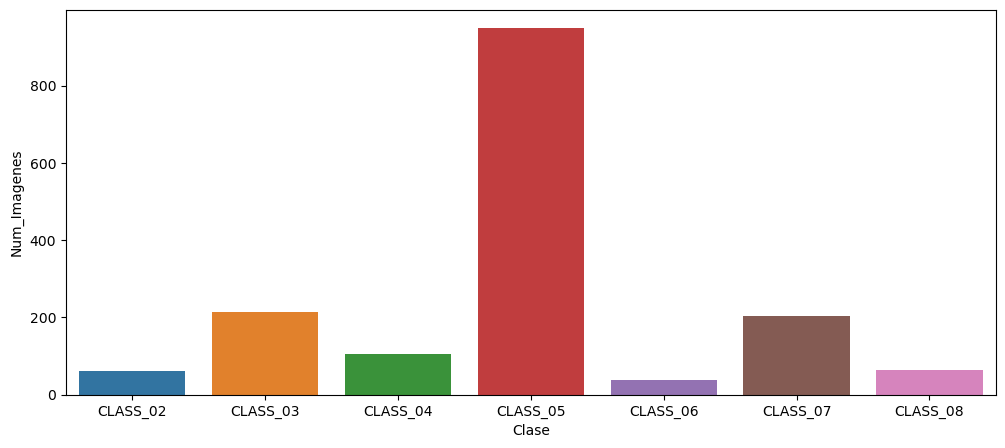

In [4]:

plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Clase", y="Num_Imagenes")
plt.show()

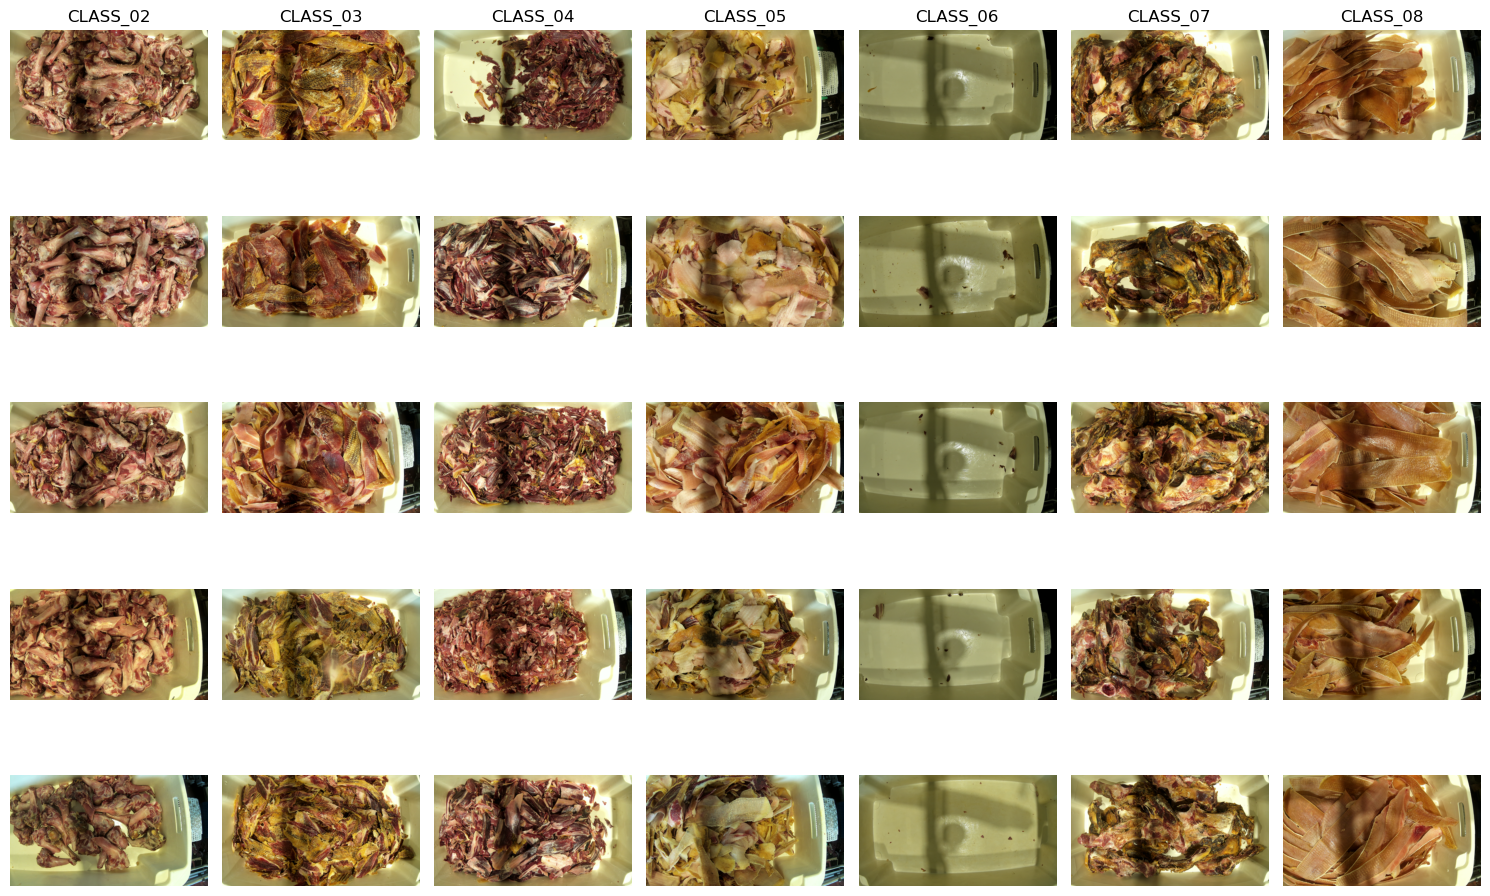

In [5]:

directorio_principal = "../CarneDataset/train/"

# Obtener la lista de carpetas (clases)
carpetas_clases = os.listdir(directorio_principal)
# carpetas_clases.remove('.ipynb_checkpoints')

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=len(clases), figsize=(15, 10))

# Recorrer las clases
for i, clase in enumerate(clases):
    # Obtener la lista de imágenes para la clase actual
    directorio_clase = os.path.join(directorio_principal, clase)
    imagenes = os.listdir(directorio_clase)

    # Verificar si hay suficientes imágenes para seleccionar 5
    if len(imagenes) >= 5:
        # Seleccionar 5 imágenes aleatorias
        imagenes_muestra = random.sample(imagenes, 5)
    else:
        # Si hay menos de 5 imágenes, seleccionar todas
        imagenes_muestra = imagenes

    # Recorrer las imágenes de muestra
    for j, imagen in enumerate(imagenes_muestra):
        # Cargar y mostrar la imagen en el subplot correspondiente
        ruta_imagen = os.path.join(directorio_clase, imagen)
        img = plt.imread(ruta_imagen)
        axs[j, i].imshow(img)
        axs[j, i].axis('off')

    # Agregar el nombre de la clase como título de la columna
    axs[0, i].set_title(clase)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

# Exploracion de Test

Se va a generar un datframe con el resumen de las imagenes por carpeta de la carpeta Test

In [6]:

# Ruta del directorio principal que contiene las carpetas de clases
directorio_principal = '../CarneDataset/test/'


# Obtener la lista de carpetas (clases)
carpetas_clases = os.listdir(directorio_principal)

# Listas para almacenar los datos
clases = []
num_imagenes = []
dimensiones_max = []
dimensiones_min = []
dimensiones_promedio = []

# Recorrer las carpetas de clases
for carpeta_clase in carpetas_clases:
    ruta_carpeta_clase = os.path.join(directorio_principal, carpeta_clase)
    if not os.path.isdir(ruta_carpeta_clase):
        continue  # Omitir archivos que no son carpetas

    # Obtener la lista de archivos de la carpeta de clase
    archivos = os.listdir(ruta_carpeta_clase)

    # Contadores de dimensiones
    dimensiones_ancho = []
    dimensiones_alto = []

    # Recorrer los archivos de la carpeta de clase
    if len(archivos) > 0:
        for archivo in archivos:
            # Comprobar si el archivo es una imagen (puedes agregar más extensiones si es necesario)
            if archivo.endswith('.jpg') or archivo.endswith('.png'):
                ruta_imagen = os.path.join(ruta_carpeta_clase, archivo)
                imagen = cv2.imread(ruta_imagen)

                # Obtener dimensiones de la imagen
                alto, ancho, _ = imagen.shape
                dimensiones_ancho.append(ancho)
                dimensiones_alto.append(alto)

        # Almacenar los datos de la clase
        clases.append(carpeta_clase)
        num_imagenes.append(len(archivos))
        if dimensiones_ancho and dimensiones_alto:  # Si las listas estan vacias
            dimensiones_max.append((max(dimensiones_ancho), max(dimensiones_alto)))
            dimensiones_min.append((min(dimensiones_ancho), min(dimensiones_alto)))
            dimensiones_promedio.append((sum(dimensiones_ancho) / len(dimensiones_ancho), sum(dimensiones_alto) / len(dimensiones_alto)))
        else:
            dimensiones_max.append((0, 0))
            dimensiones_min.append((0, 0))
            dimensiones_promedio.append((0, 0))



In [ ]:
# Crear el DataFrame
data = {
    'Clase': clases,
    'Num_Imagenes': num_imagenes,
    'Dimensiones_Maximas': dimensiones_max,
    'Dimensiones_Minimas': dimensiones_min,
    'Dimensiones_Promedio': dimensiones_promedio
}
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.sort_values(by="Clase")

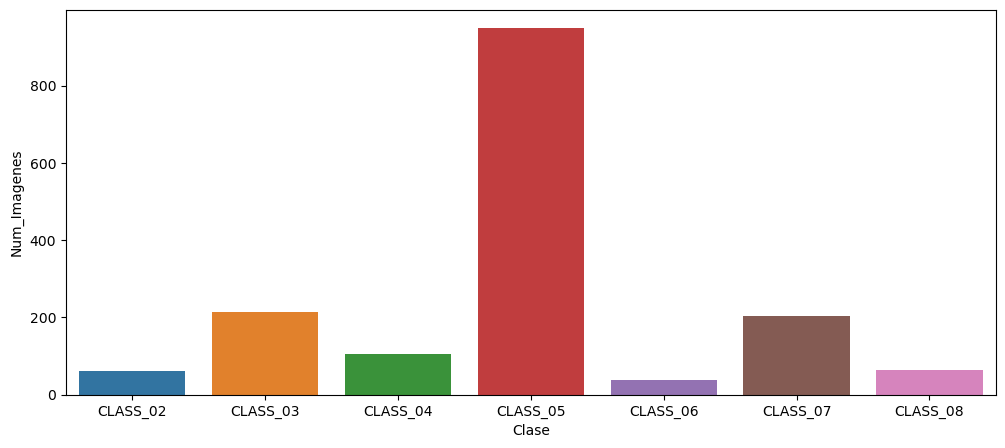

In [7]:


plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Clase", y="Num_Imagenes")
plt.show()

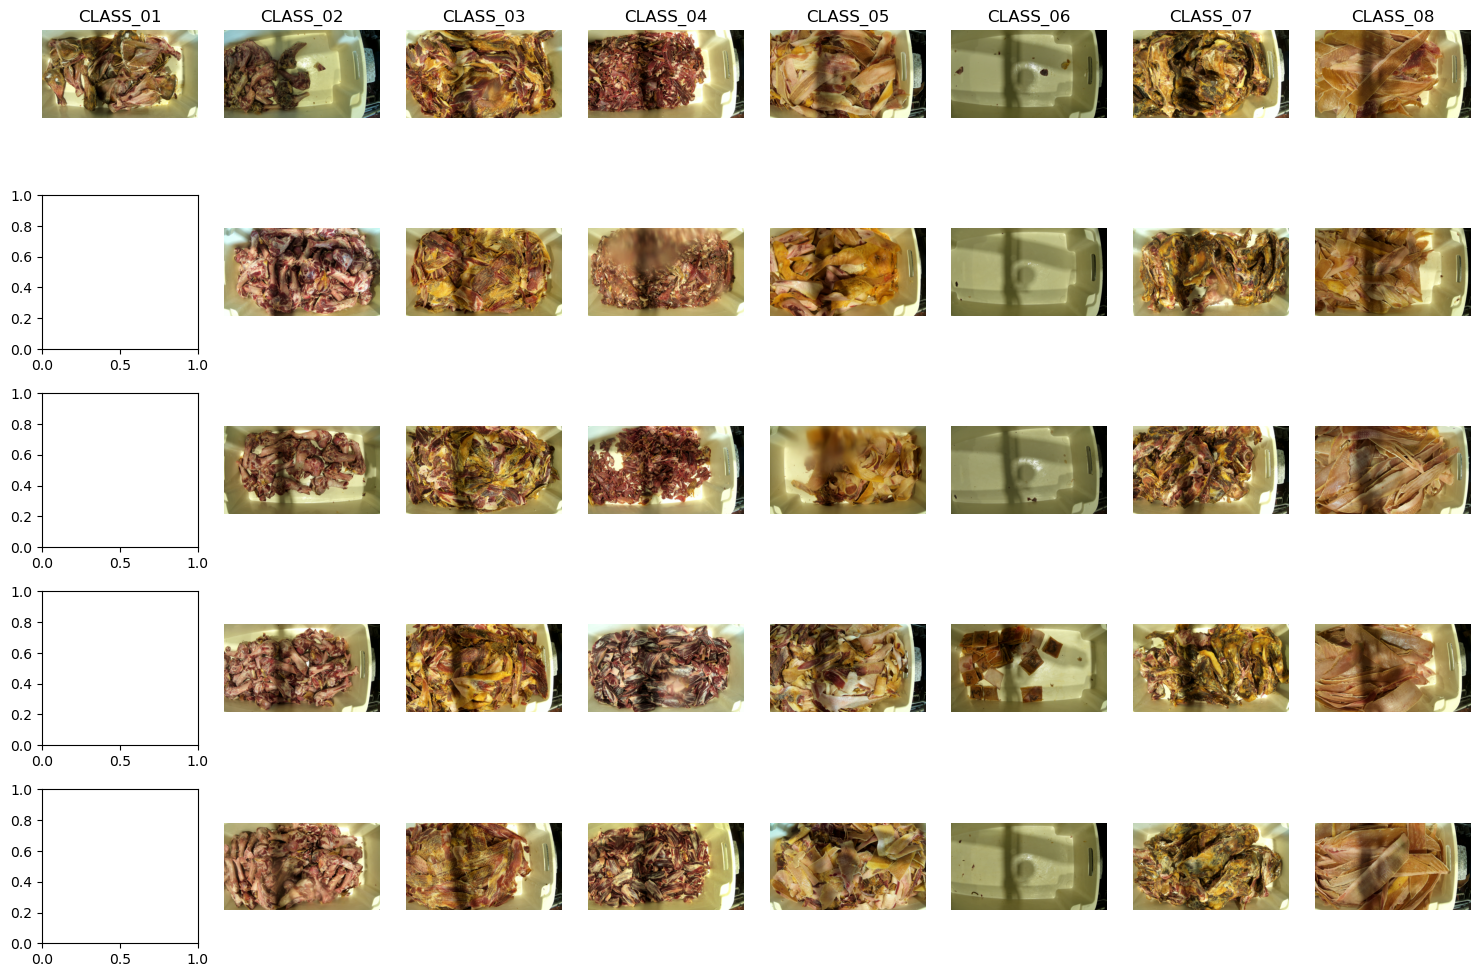

In [8]:

directorio_principal = "../CarneDataset/test/"

# Obtener la lista de carpetas (clases)
carpetas_clases = os.listdir(directorio_principal)

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=len(clases), figsize=(15, 10))

# Recorrer las clases
for i, clase in enumerate(clases):
    # Obtener la lista de imágenes para la clase actual
    directorio_clase = os.path.join(directorio_principal, clase)
    imagenes = os.listdir(directorio_clase)

    # Verificar si hay suficientes imágenes para seleccionar 5
    if len(imagenes) >= 5:
        # Seleccionar 5 imágenes aleatorias
        imagenes_muestra = random.sample(imagenes, 5)
    else:
        # Si hay menos de 5 imágenes, seleccionar todas
        imagenes_muestra = imagenes

    # Recorrer las imágenes de muestra
    for j, imagen in enumerate(imagenes_muestra):
        # Cargar y mostrar la imagen en el subplot correspondiente
        ruta_imagen = os.path.join(directorio_clase, imagen)
        img = plt.imread(ruta_imagen)
        axs[j, i].imshow(img)
        axs[j, i].axis('off')

    # Agregar el nombre de la clase como título de la columna
    axs[0, i].set_title(clase)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

## Conclusión de la base de datos de test
- Existen imagenes que no corresponden a la clase o son ouliers que generan perturbacion en la clasificacion final

# Preparacion de los datos

In [9]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import os

## Se toma las imagenes de la fuente sin hacer aumento de datos

In [10]:
directorio_raiz_train = "../CarneDataset/train/"

# Configurar el generador de imágenes
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
BATCH_SIZE=32

# Generador de imágenes de entrenamiento
train_generator = datagen.flow_from_directory(
    directorio_raiz_train,
    target_size=(384, 216),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Generador de imágenes de validación
val_generator = datagen.flow_from_directory(
    directorio_raiz_train,
    target_size=(384, 216),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1310 images belonging to 8 classes.
Found 323 images belonging to 8 classes.


# Diseño de arquitecturas de Deep Learning

In [11]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Convoluciones 2d

In [12]:
# Crear y compilar el modelo de TensorFlow

model = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(384, 216, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')
])
model.summary()

# Compila el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
epochs = 10  # Número de épocas
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 214, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 191, 107, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 105, 16)      592       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 52, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 48, 64)        1

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

11/11 [==============================] - 4s 324ms/step


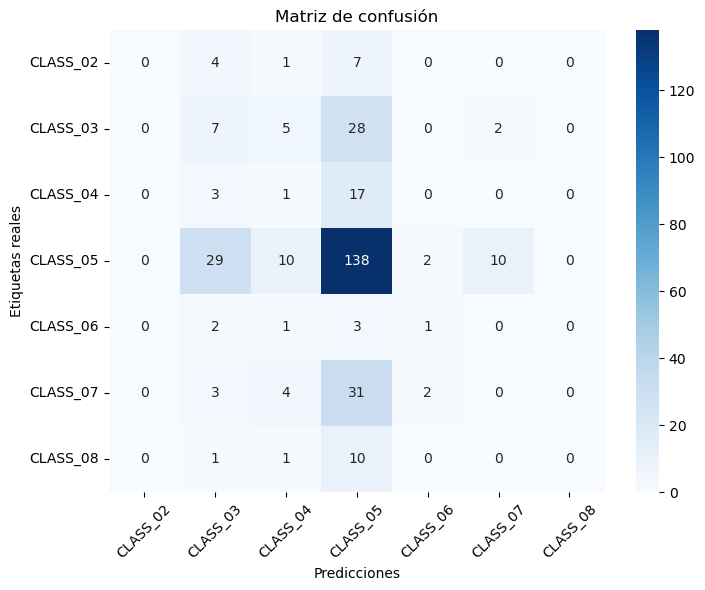

In [14]:
# Obtener las etiquetas reales del conjunto de validación
y_true = val_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(val_generator.class_indices.keys())
class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()


In [15]:
from sklearn.metrics import classification_report

# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.14      0.17      0.15        42
           3       0.04      0.05      0.05        21
           4       0.59      0.73      0.65       189
           5       0.20      0.14      0.17         7
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        12

    accuracy                           0.46       323
   macro avg       0.14      0.16      0.15       323
weighted avg       0.37      0.46      0.41       323



C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


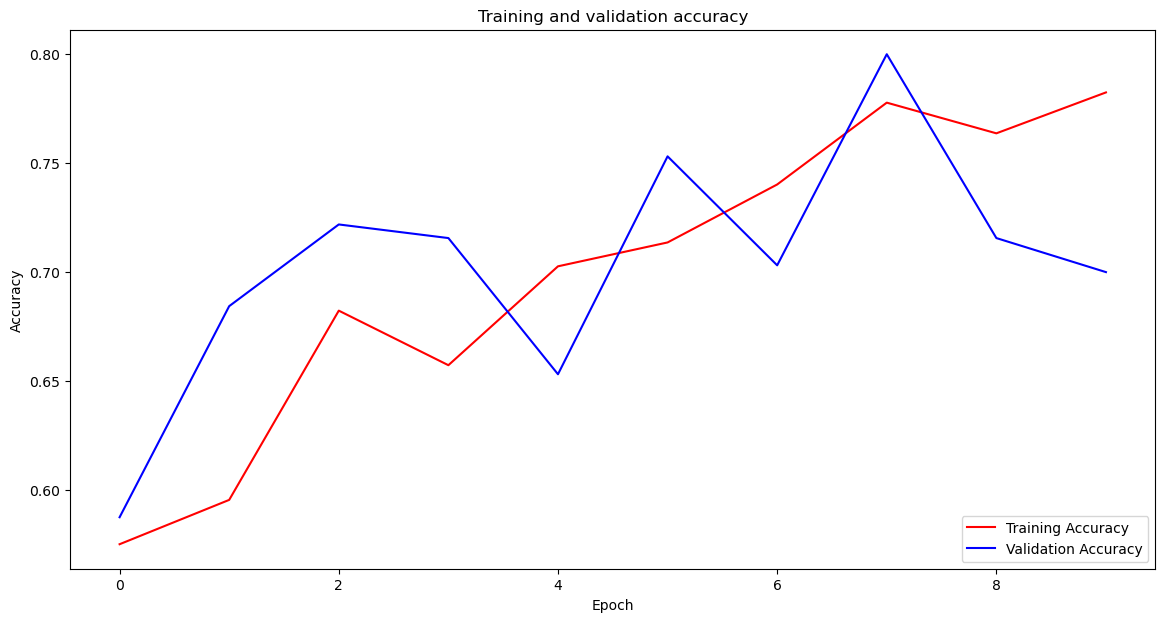

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

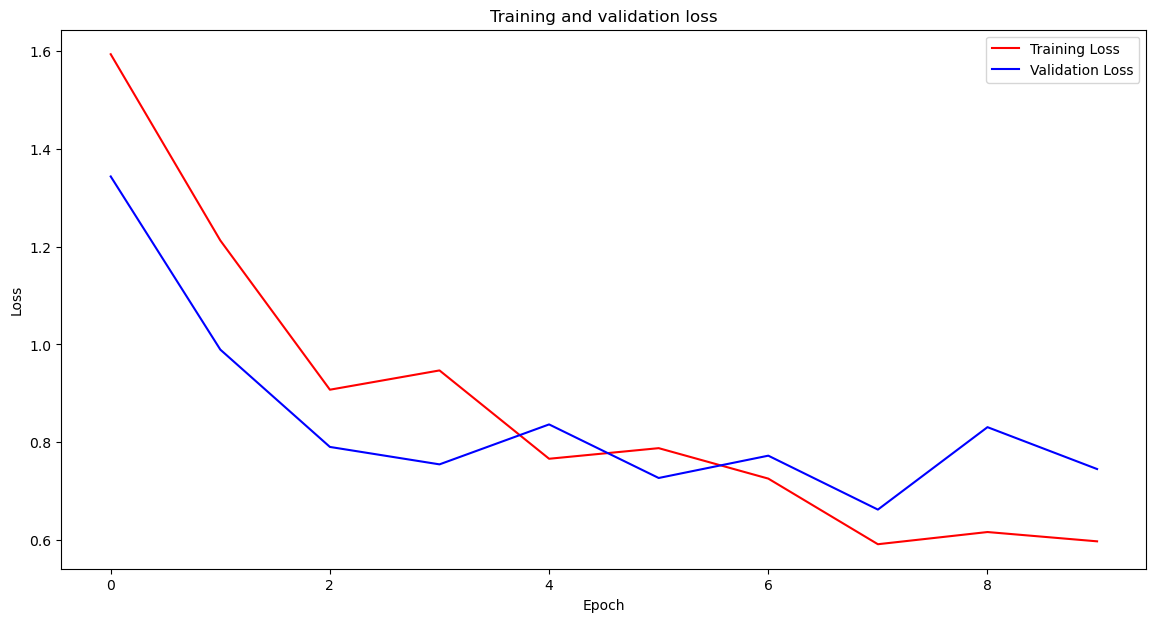

In [17]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

## Evaluación en el conjunto de TEST

In [18]:
directorio_raiz_test = "../CarneDataset/test/"

# Generador de imágenes de validación
test_generator = datagen.flow_from_directory(
    directorio_raiz_test,
    target_size=(384, 216),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 810 images belonging to 8 classes.


26/26 [==============================] - 9s 341ms/step


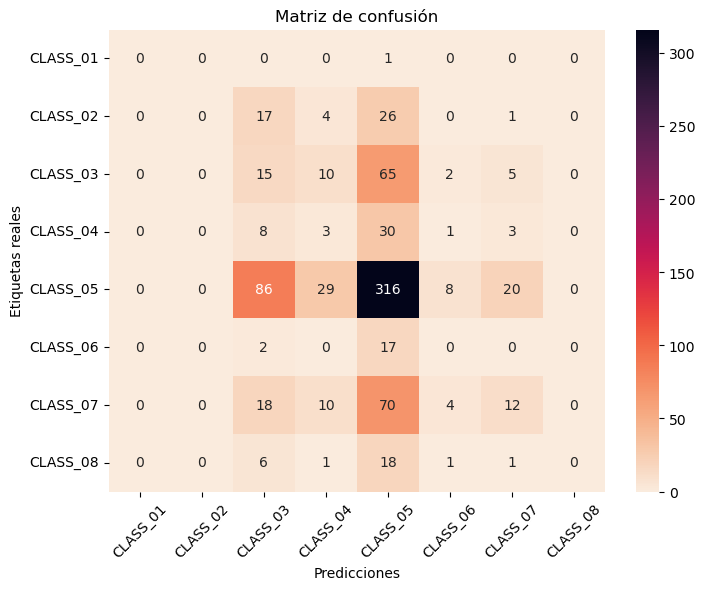

In [19]:
# Obtener las etiquetas reales del conjunto de validación
y_true = test_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="rocket_r", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()


In [20]:
from sklearn.metrics import classification_report

# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        48
           2       0.10      0.15      0.12        97
           3       0.05      0.07      0.06        45
           4       0.58      0.69      0.63       459
           5       0.00      0.00      0.00        19
           6       0.29      0.11      0.15       114
           7       0.00      0.00      0.00        27

    accuracy                           0.43       810
   macro avg       0.13      0.13      0.12       810
weighted avg       0.38      0.43      0.40       810



C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Segunda arquitectura testeada CONV 2d


In [21]:
model = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(384, 216, 3)),
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),  # Agrega Dropout con una tasa de 0.5
    Dense(512, activation='relu'),
    Dropout(0.5),  # Agrega Dropout con una tasa de 0.5
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 382, 214, 4)       112       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 191, 107, 4)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 189, 105, 16)      592       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 94, 52, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 92, 50, 32)        4640      
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 48, 64)       

In [22]:
# Compila el modelo
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Puedes ajustar la tasa de aprendizaje según tus necesidades
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
epochs = 10  # Número de épocas
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1
)

Epoch 1/10
40/40 [==============================] - 71s 2s/step - loss: 1.5463 - accuracy: 0.5712 - val_loss: 1.3938 - val_accuracy: 0.5875
Epoch 2/10
40/40 [==============================] - 71s 2s/step - loss: 1.3752 - accuracy: 0.5806 - val_loss: 1.3228 - val_accuracy: 0.5875
Epoch 3/10
40/40 [==============================] - 70s 2s/step - loss: 1.3223 - accuracy: 0.5712 - val_loss: 1.4024 - val_accuracy: 0.4656
Epoch 4/10
40/40 [==============================] - 74s 2s/step - loss: 1.0159 - accuracy: 0.6291 - val_loss: 1.1632 - val_accuracy: 0.6094
Epoch 5/10
40/40 [==============================] - 74s 2s/step - loss: 0.8456 - accuracy: 0.6753 - val_loss: 1.1039 - val_accuracy: 0.6719
Epoch 6/10
40/40 [==============================] - 71s 2s/step - loss: 0.8165 - accuracy: 0.6847 - val_loss: 0.7664 - val_accuracy: 0.6969
Epoch 7/10
40/40 [==============================] - 71s 2s/step - loss: 0.7416 - accuracy: 0.7058 - val_loss: 0.8987 - val_accuracy: 0.6687
Epoch 8/10
40/40 [==

11/11 [==============================] - 4s 341ms/step


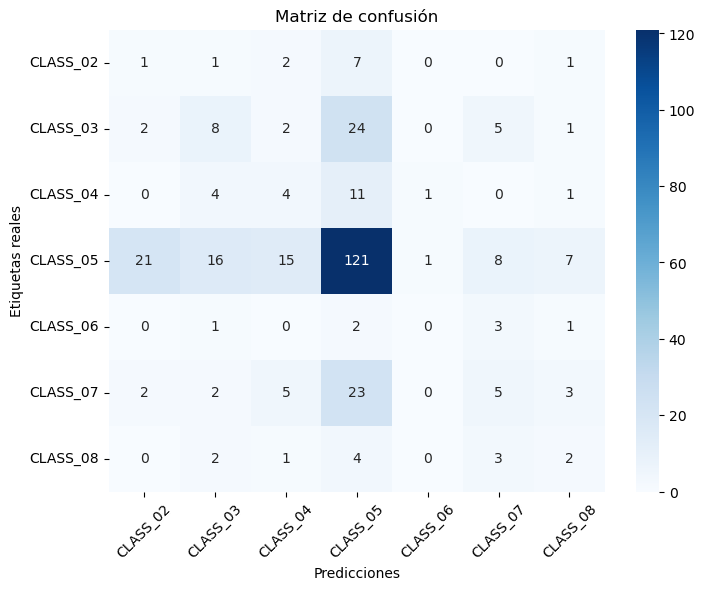

In [23]:
# Obtener las etiquetas reales del conjunto de validación
y_true = val_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(val_generator.class_indices.keys())
class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()


In [24]:

# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           1       0.04      0.08      0.05        12
           2       0.24      0.19      0.21        42
           3       0.14      0.19      0.16        21
           4       0.63      0.64      0.64       189
           5       0.00      0.00      0.00         7
           6       0.21      0.12      0.16        40
           7       0.12      0.17      0.14        12

    accuracy                           0.44       323
   macro avg       0.20      0.20      0.19       323
weighted avg       0.44      0.44      0.44       323



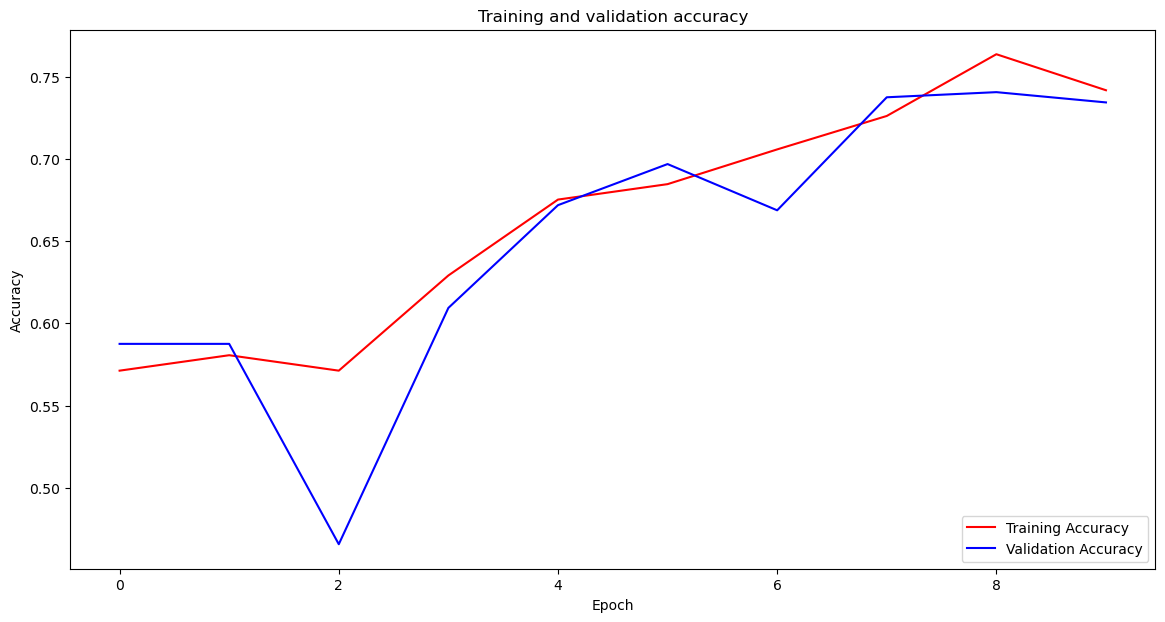

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

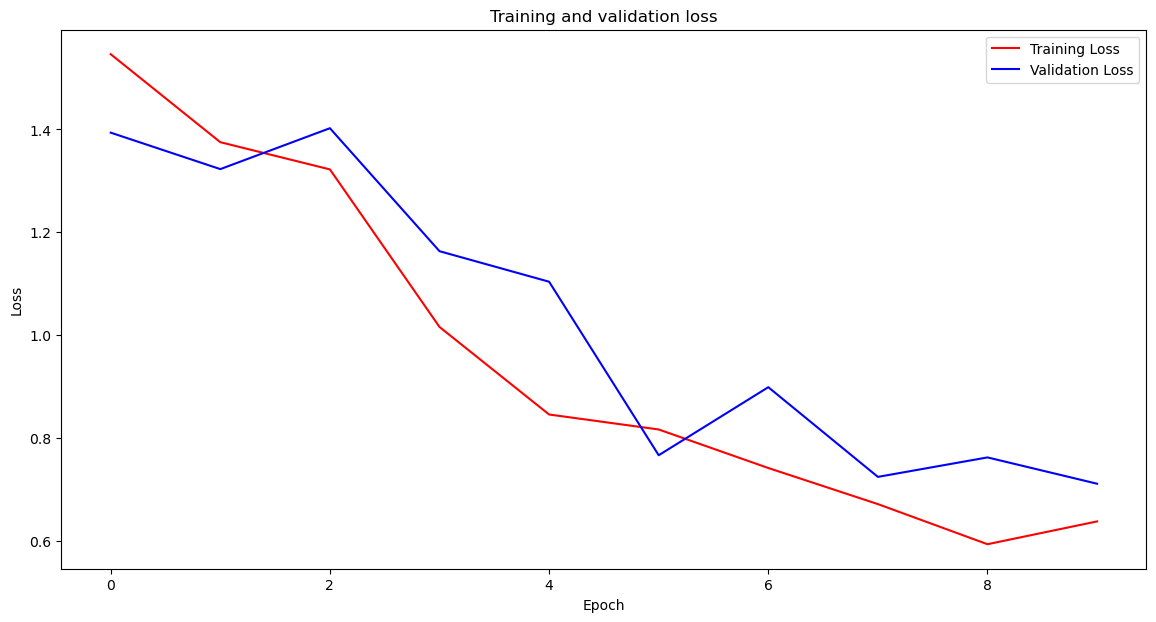

In [26]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

## Evaluacion del modelo en el conjunto de TEST

26/26 [==============================] - 9s 329ms/step


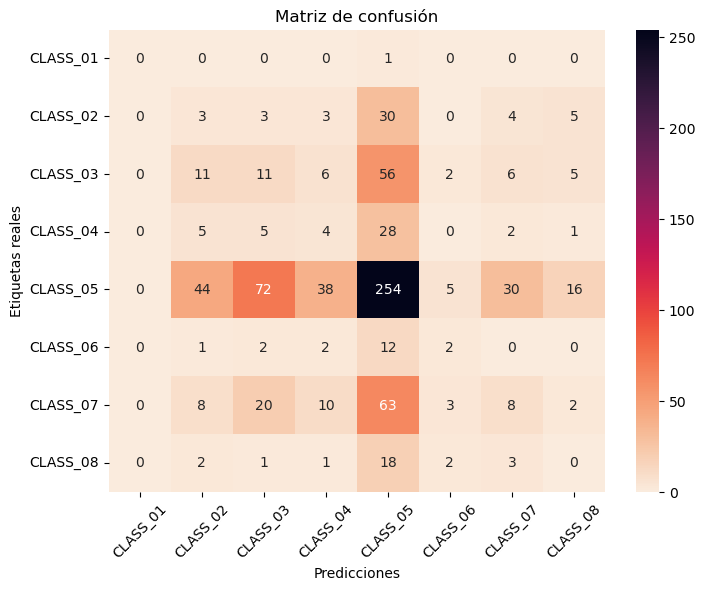

In [27]:
# Obtener las etiquetas reales del conjunto de validación
y_true = test_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="rocket_r", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()


# Aplicamos la tecnica de Trasnsferencia de aprendizaje


## Red neuronal convolucional RESNET 50 con pesos pre entrenados de imagenet

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generador de imágenes de entrenamiento
train_generator = datagen.flow_from_directory(
    directorio_raiz_train,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generador de imágenes de validación
val_generator = datagen.flow_from_directory(
    directorio_raiz_train,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

directorio_raiz_test = "../CarneDataset/test/"

# Generador de imágenes de validación
test_generator = datagen.flow_from_directory(
    directorio_raiz_test,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1310 images belonging to 8 classes.
Found 323 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Cargar la arquitectura ResNet50 (sin incluir las capas fully connected)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base (ResNet50)
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas adicionales al final del modelo
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(8, activation='softmax')(x)

# Crear el nuevo modelo combinando el modelo base (ResNet50) y las nuevas capas
model = Model(inputs=base_model.input, outputs=output)
model.summary()

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1,
    # callbacks=[best_model]
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

40/40 [==============================] - 177s 4s/step - loss: 0.4864 - accuracy: 0.8247 - val_loss: 0.6078 - val_accuracy: 0.7656
Epoch 13/15
40/40 [==============================] - 176s 4s/step - loss: 0.4216 - accuracy: 0.8404 - val_loss: 0.9920 - val_accuracy: 0.7375
Epoch 14/15
40/40 [==============================] - 177s 4s/step - loss: 0.4810 - accuracy: 0.8380 - val_loss: 0.5484 - val_accuracy: 0.7781
Epoch 15/15
40/40 [==============================] - 170s 4s/step - loss: 0.3418 - accuracy: 0.8818 - val_loss: 0.4902 - val_accuracy: 0.8344


11/11 [==============================] - 30s 3s/step


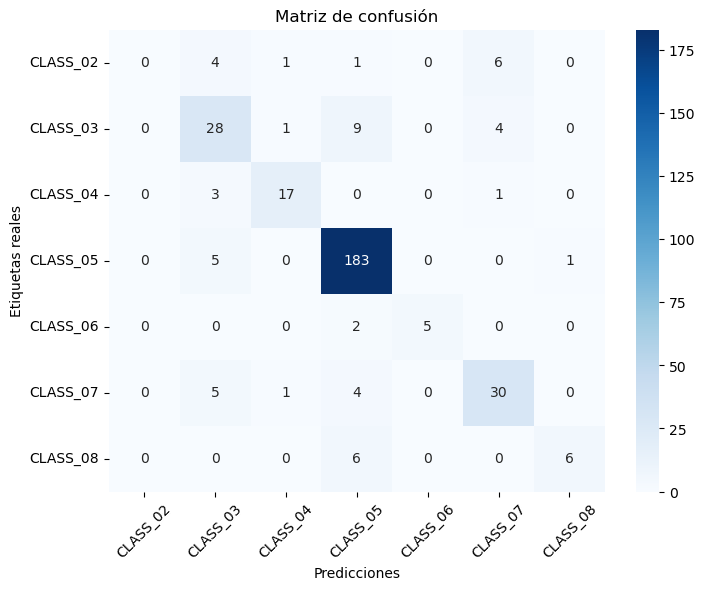

In [30]:
# Obtener las etiquetas reales del conjunto de validación
y_true = val_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(val_generator.class_indices.keys())
class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()

In [31]:
from sklearn.metrics import classification_report

# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.62      0.67      0.64        42
           3       0.85      0.81      0.83        21
           4       0.89      0.97      0.93       189
           5       1.00      0.71      0.83         7
           6       0.73      0.75      0.74        40
           7       0.86      0.50      0.63        12

    accuracy                           0.83       323
   macro avg       0.71      0.63      0.66       323
weighted avg       0.80      0.83      0.81       323



C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conjunto de TEST

26/26 [==============================] - 73s 3s/step


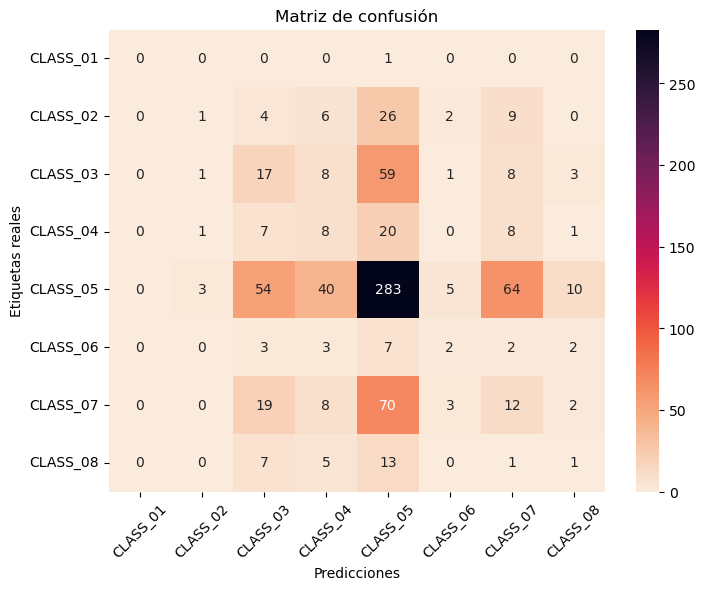

In [32]:
# Obtener las etiquetas reales del conjunto de test
y_true = test_generator.classes

# Obtener las predicciones del modelo en el conjunto de test
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="rocket_r", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()


In [33]:
# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.17      0.02      0.04        48
           2       0.15      0.18      0.16        97
           3       0.10      0.18      0.13        45
           4       0.59      0.62      0.60       459
           5       0.15      0.11      0.12        19
           6       0.12      0.11      0.11       114
           7       0.05      0.04      0.04        27

    accuracy                           0.40       810
   macro avg       0.17      0.15      0.15       810
weighted avg       0.39      0.40      0.39       810



C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MODELO CAMPEON: Red neuronal convolucional VGG16 con pesos preentrnados de imagenet

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Cargar la arquitectura VGG16 (sin incluir las capas fully connected)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base (VGG16)
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas adicionales al final del modelo
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(8, activation='softmax')(x)

# Crear el nuevo modelo combinando el modelo base (VGG16) y las nuevas capas
model = Model(inputs=base_model.input, outputs=output)
model.summary()

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1,
    # callbacks=[best_model]
)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

11/11 [==============================] - 62s 6s/step


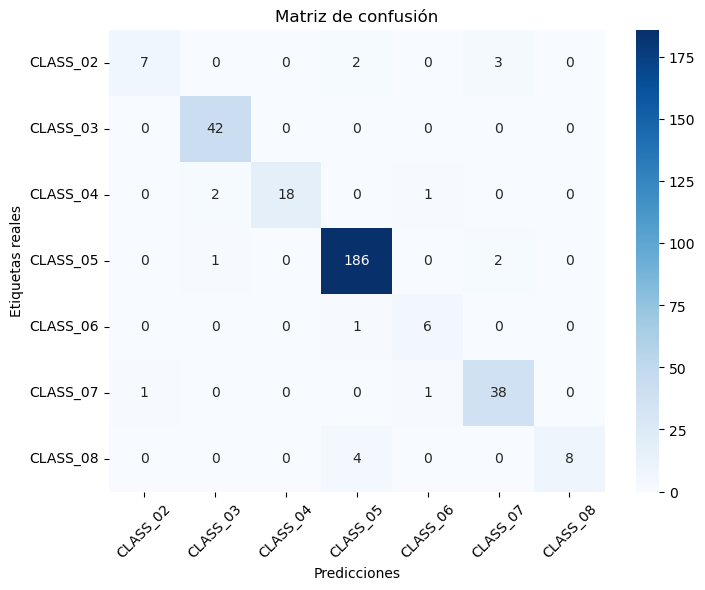

In [35]:
# Obtener las etiquetas reales del conjunto de validación
y_true = val_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(val_generator.class_indices.keys())
class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()

In [37]:

# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           1       0.88      0.58      0.70        12
           2       0.93      1.00      0.97        42
           3       1.00      0.86      0.92        21
           4       0.96      0.98      0.97       189
           5       0.75      0.86      0.80         7
           6       0.88      0.95      0.92        40
           7       1.00      0.67      0.80        12

    accuracy                           0.94       323
   macro avg       0.92      0.84      0.87       323
weighted avg       0.95      0.94      0.94       323



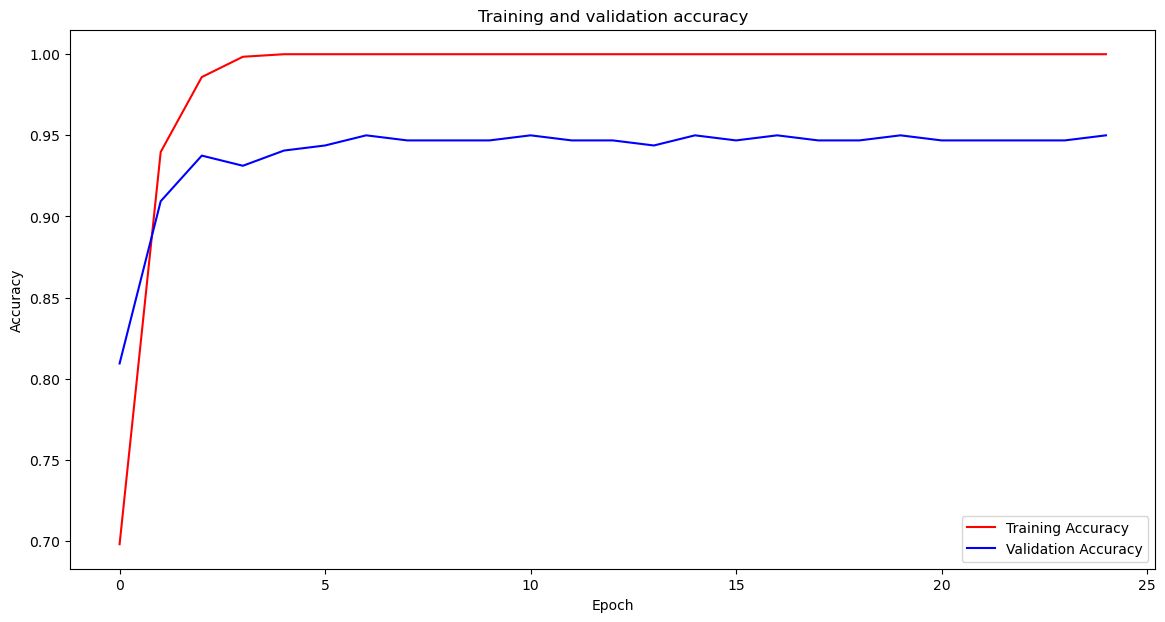

In [38]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

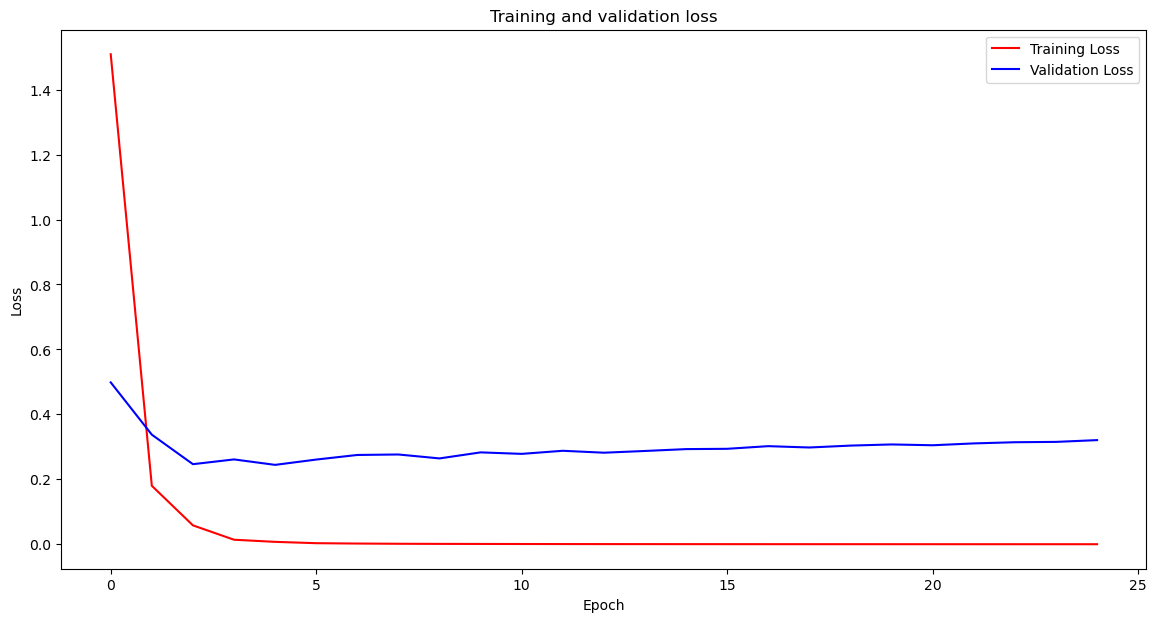

In [39]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

### Conjunto de TEST

26/26 [==============================] - 148s 6s/step


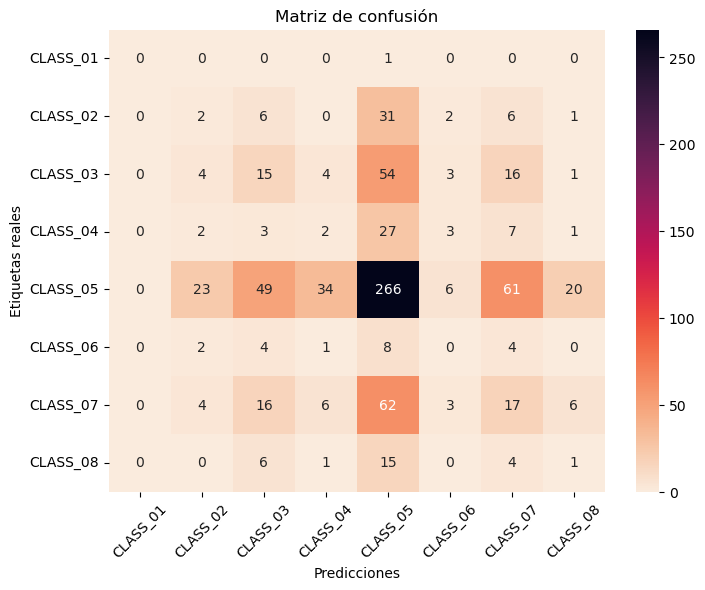

In [40]:
# Obtener las etiquetas reales del conjunto de validación
y_true = test_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="rocket_r", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())
# class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()

In [42]:
# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.05      0.04      0.05        48
           2       0.15      0.15      0.15        97
           3       0.04      0.04      0.04        45
           4       0.57      0.58      0.58       459
           5       0.00      0.00      0.00        19
           6       0.15      0.15      0.15       114
           7       0.03      0.04      0.04        27

    accuracy                           0.37       810
   macro avg       0.13      0.13      0.13       810
weighted avg       0.37      0.37      0.37       810



C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jibadanu\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Aplicacion de la tecnica de aumento de datos

In [ ]:
# !rm -rf /content/drive/MyDrive/CarneDatasetTrainBalanced # Descomentar esta linea para volver a generar el aumento de datos

In [52]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Ruta de la carpeta raíz que contiene las clases de imágenes
root_directory = '../CarneDataset/train/'

# Ruta de la carpeta donde se guardarán las imágenes balanceadas
balanced_directory = '../CarneDatasetTrainBalanced/'
# Límite máximo de imágenes por clase
max_images_per_class = 600

# Crear un ImageDataGenerator para el aumento de datos
data_augmentation_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.3),
    shear_range=10,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Recorrer cada subdirectorio (clase) en el directorio raíz
for class_name in os.listdir(root_directory):
    class_directory = os.path.join(root_directory, class_name)

    # Verificar si se requiere balancear la clase
    if len(os.listdir(class_directory)) > max_images_per_class:
        # Tomar una muestra aleatoria de imágenes
        sampled_images = random.sample(os.listdir(class_directory), max_images_per_class)

        # Crear el directorio de la clase balanceada
        balanced_class_directory = os.path.join(balanced_directory, class_name)
        os.makedirs(balanced_class_directory, exist_ok=True)

        # Copiar las imágenes seleccionadas al directorio balanceado
        for image_name in sampled_images:
            src_path = os.path.join(class_directory, image_name)
            dst_path = os.path.join(balanced_class_directory, image_name)
            shutil.copyfile(src_path, dst_path)

    elif len(os.listdir(class_directory)) == 0:
      print(f"La clase {class_name} no tiene imagenes saltando...")
      continue

    elif len(os.listdir(class_directory)) < max_images_per_class:
        # Crear el directorio de la clase balanceada
        balanced_class_directory = os.path.join(balanced_directory, class_name)
        os.makedirs(balanced_class_directory, exist_ok=True)

        # Generar imágenes adicionales usando el ImageDataGenerator
        image_generator = data_augmentation_generator.flow_from_directory(
            root_directory,
            target_size=(216,384),
            batch_size=1,
            class_mode='categorical',
            classes=[class_name],
            save_to_dir=balanced_class_directory,
            save_format='jpg'
        )

        # Generar imágenes hasta alcanzar el límite deseado
        generated_images = 0
        while generated_images < max_images_per_class:
            batch = image_generator.next()
            generated_images += batch[0].shape[0]

        print(f"Aumento de datos completado para la clase {class_name}")
    else:
        print(f"La clase {class_name} ya tiene el número deseado de imágenes")

print("Proceso de balanceo de dataset completado")


Found 1 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_01
Found 62 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_02
Found 213 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_03
Found 105 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_04
Found 37 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_06
Found 204 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_07
Found 63 images belonging to 1 classes.
Aumento de datos completado para la clase CLASS_08
Proceso de balanceo de dataset completado


In [53]:
# Obtener la lista de carpetas (clases)
carpetas_clases = os.listdir(balanced_directory)

# Listas para almacenar los datos
clases = []
num_imagenes = []
dimensiones_max = []
dimensiones_min = []
dimensiones_promedio = []

# Recorrer las carpetas de clases
for carpeta_clase in carpetas_clases:
    ruta_carpeta_clase = os.path.join(balanced_directory, carpeta_clase)
    if not os.path.isdir(ruta_carpeta_clase):
        continue  # Omitir archivos que no son carpetas

    # Obtener la lista de archivos de la carpeta de clase
    archivos = os.listdir(ruta_carpeta_clase)

    # Contadores de dimensiones
    dimensiones_ancho = []
    dimensiones_alto = []

    # Recorrer los archivos de la carpeta de clase
    if len(archivos) > 0:
        for archivo in archivos:
            # Comprobar si el archivo es una imagen (puedes agregar más extensiones si es necesario)
            if archivo.endswith('.jpg') or archivo.endswith('.png'):
                ruta_imagen = os.path.join(ruta_carpeta_clase, archivo)
                imagen = cv2.imread(ruta_imagen)

                # Obtener dimensiones de la imagen
                alto, ancho, _ = imagen.shape
                dimensiones_ancho.append(ancho)
                dimensiones_alto.append(alto)

        # Almacenar los datos de la clase
        clases.append(carpeta_clase)
        num_imagenes.append(len(archivos))
        if dimensiones_ancho and dimensiones_alto:  # Si las listas estan vacias
            dimensiones_max.append((max(dimensiones_ancho), max(dimensiones_alto)))
            dimensiones_min.append((min(dimensiones_ancho), min(dimensiones_alto)))
            dimensiones_promedio.append((sum(dimensiones_ancho) / len(dimensiones_ancho), sum(dimensiones_alto) / len(dimensiones_alto)))
        else:
            dimensiones_max.append((0, 0))
            dimensiones_min.append((0, 0))
            dimensiones_promedio.append((0, 0))


In [54]:
# Crear el DataFrame
data = {
    'Clase': clases,
    'Num_Imagenes': num_imagenes,
    'Dimensiones_Maximas': dimensiones_max,
    'Dimensiones_Minimas': dimensiones_min,
    'Dimensiones_Promedio': dimensiones_promedio
}
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.sort_values(by="Clase")

Clase  Num_Imagenes Dimensiones_Maximas Dimensiones_Minimas  \
0  CLASS_01           600          (384, 216)          (384, 216)   
1  CLASS_02          1200          (384, 216)          (384, 216)   
2  CLASS_03          1200          (384, 216)          (384, 216)   
3  CLASS_04          1200          (384, 216)          (384, 216)   
4  CLASS_05           810          (384, 216)          (384, 216)   
5  CLASS_06          1200          (384, 216)          (384, 216)   
6  CLASS_07          1200          (384, 216)          (384, 216)   
7  CLASS_08          1200          (384, 216)          (384, 216)   

  Dimensiones_Promedio  
0       (384.0, 216.0)  
1       (384.0, 216.0)  
2       (384.0, 216.0)  
3       (384.0, 216.0)  
4       (384.0, 216.0)  
5       (384.0, 216.0)  
6       (384.0, 216.0)  
7       (384.0, 216.0)

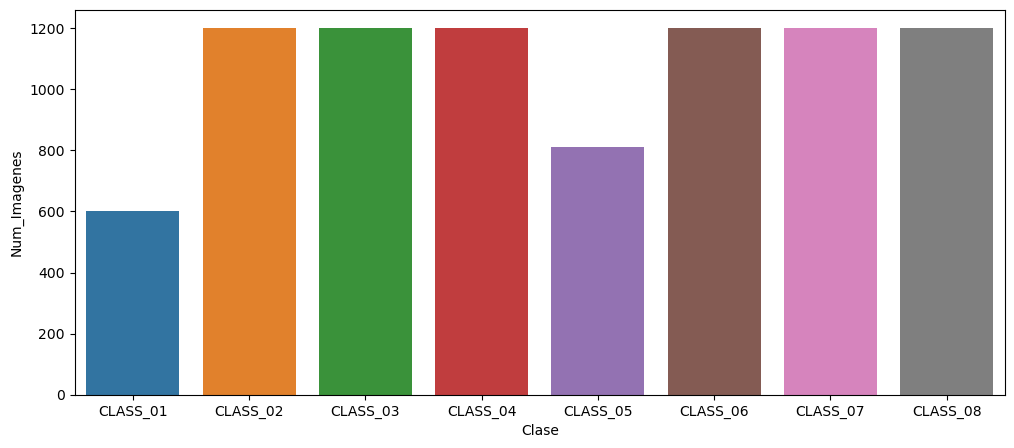

In [55]:

plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Clase", y="Num_Imagenes")
plt.show()

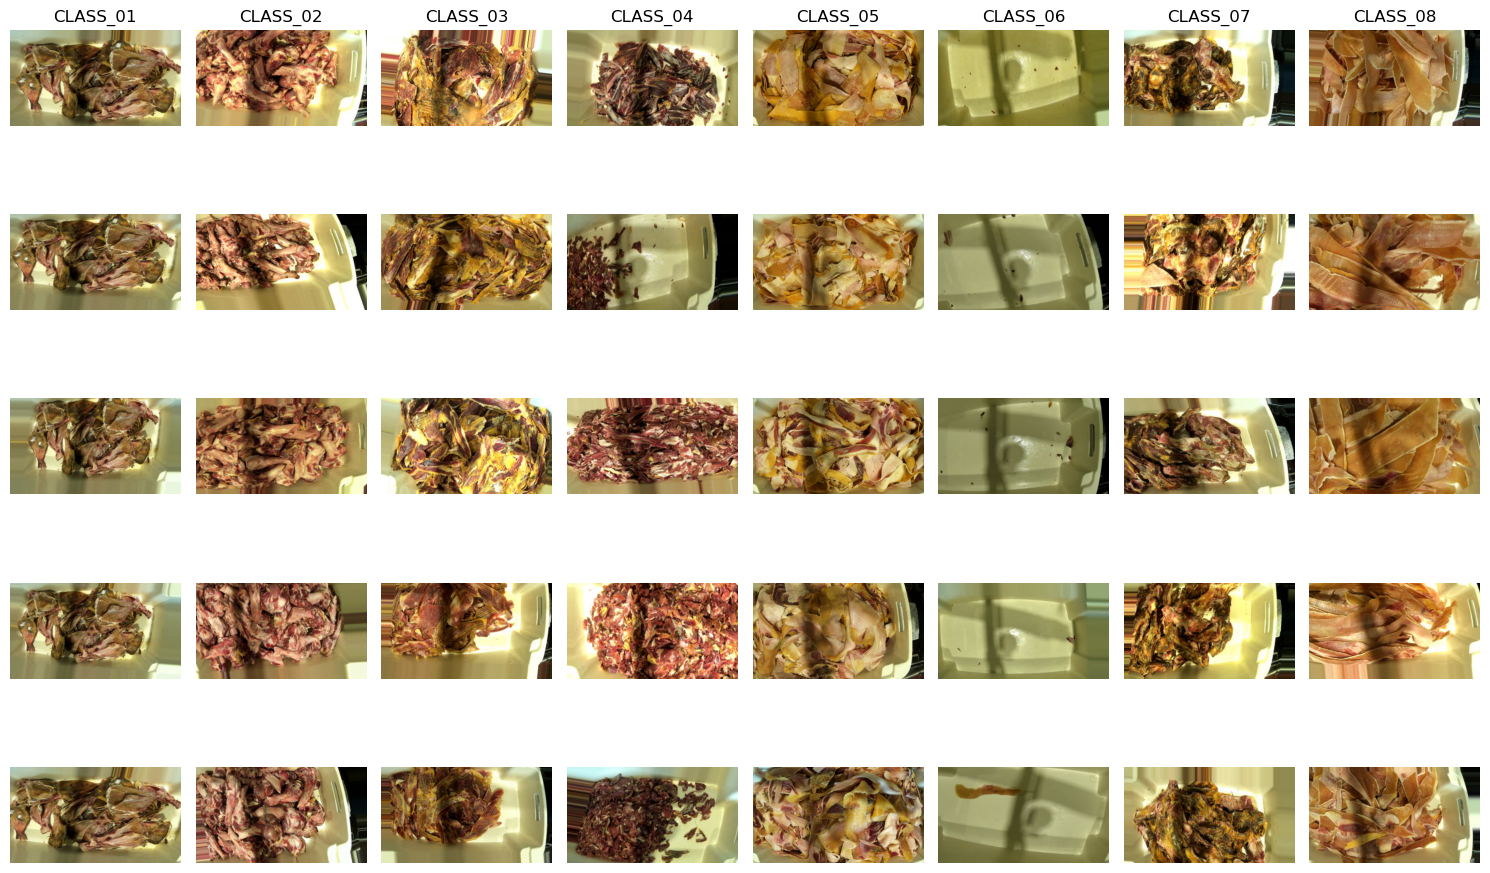

In [56]:
# Obtener la lista de carpetas (clases)
carpetas_clases = os.listdir(balanced_directory)
# carpetas_clases.remove('.ipynb_checkpoints')

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=len(clases), figsize=(15, 10))

# Recorrer las clases
for i, clase in enumerate(clases):
    # Obtener la lista de imágenes para la clase actual
    #directorio_clase = os.path.join(balanced_folder, clase)
    directorio_clase = os.path.join(balanced_directory, clase)
    imagenes = os.listdir(directorio_clase)

    # Verificar si hay suficientes imágenes para seleccionar 5
    if len(imagenes) >= 5:
        # Seleccionar 5 imágenes aleatorias
        imagenes_muestra = random.sample(imagenes, 5)
    else:
        # Si hay menos de 5 imágenes, seleccionar todas
        imagenes_muestra = imagenes

    # Recorrer las imágenes de muestra
    for j, imagen in enumerate(imagenes_muestra):
        # Cargar y mostrar la imagen en el subplot correspondiente
        ruta_imagen = os.path.join(directorio_clase, imagen)
        img = plt.imread(ruta_imagen)
        axs[j, i].imshow(img)
        axs[j, i].axis('off')

    # Agregar el nombre de la clase como título de la columna
    axs[0, i].set_title(clase)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

## Preparacion de los datos

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=32


datagen = ImageDataGenerator(
    validation_split=0.3
)

# Generador de imágenes de entrenamiento
train_generator = datagen.flow_from_directory(
    balanced_directory,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generador de imágenes de validación
val_generator = datagen.flow_from_directory(
    balanced_directory,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# directorio_raiz_test = "/content/drive/MyDrive/CarneDataset/test/"

# Generador de imágenes de test
test_generator = datagen.flow_from_directory(
    directorio_raiz_test,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 6027 images belonging to 8 classes.
Found 2583 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


## Aplico el modelo campeon VGG16

In [58]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Cargar la arquitectura VGG16 (sin incluir las capas fully connected)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base (VGG16)
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas adicionales al final del modelo
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(8, activation='softmax')(x)

# Crear el nuevo modelo combinando el modelo base (VGG16) y las nuevas capas
model = Model(inputs=base_model.input, outputs=output)
model.summary()

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1,
    # callbacks=[best_model]
)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

81/81 [==============================] - 480s 6s/step


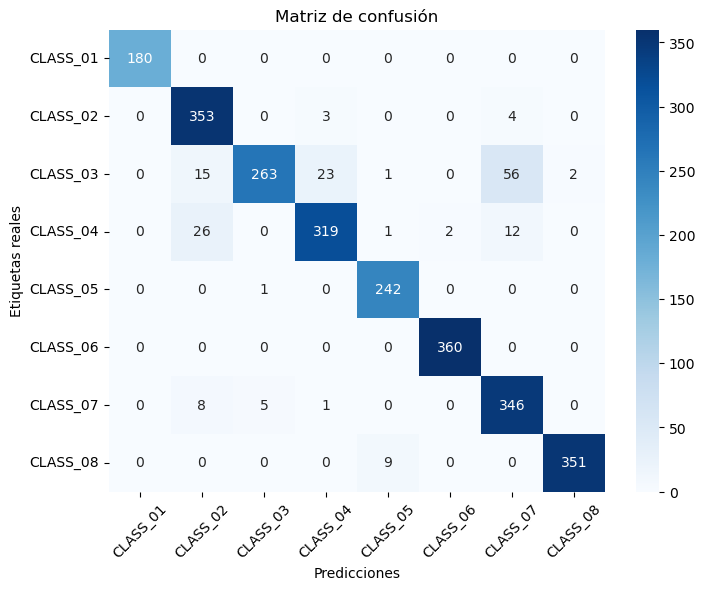

In [59]:
# Obtener las etiquetas reales del conjunto de validación
y_true = val_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(val_generator.class_indices.keys())
#class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()

In [60]:

# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       0.88      0.98      0.93       360
           2       0.98      0.73      0.84       360
           3       0.92      0.89      0.90       360
           4       0.96      1.00      0.98       243
           5       0.99      1.00      1.00       360
           6       0.83      0.96      0.89       360
           7       0.99      0.97      0.98       360

    accuracy                           0.93      2583
   macro avg       0.94      0.94      0.94      2583
weighted avg       0.94      0.93      0.93      2583



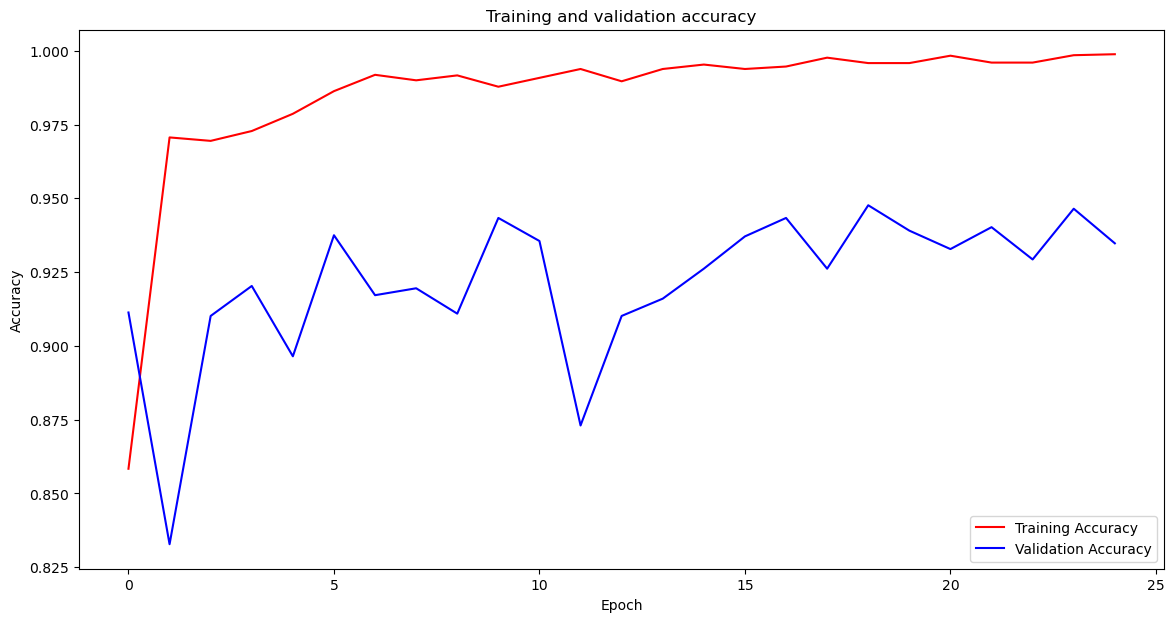

In [61]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

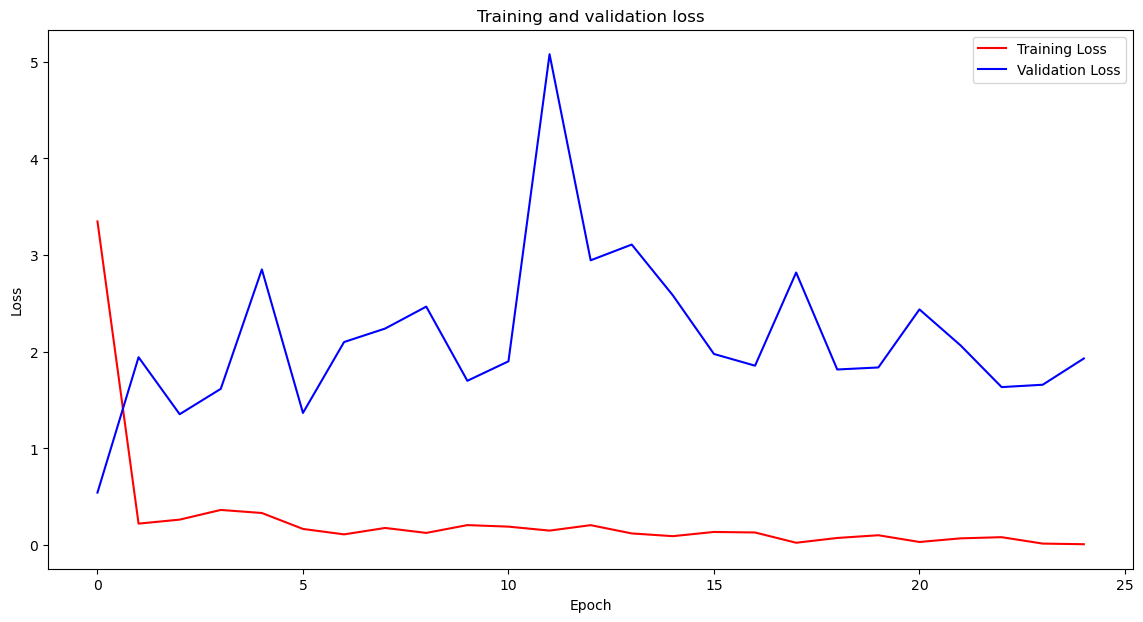

In [62]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

### Conjunto de TEST

26/26 [==============================] - 162s 6s/step


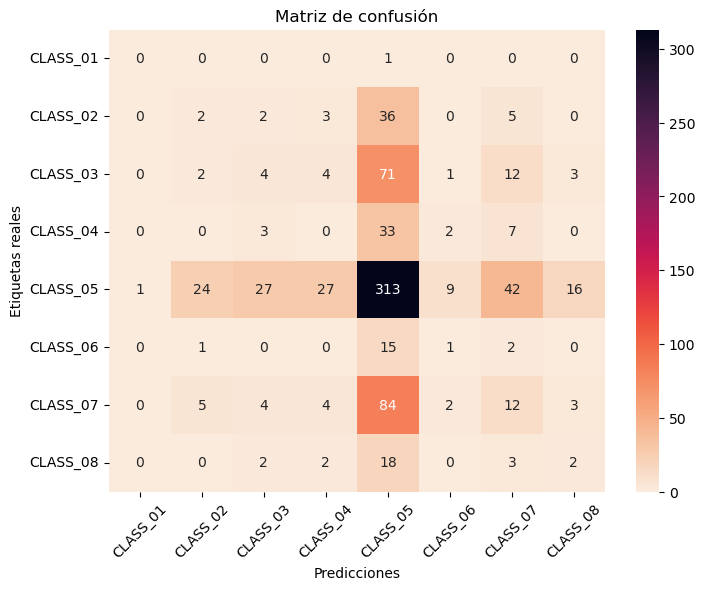

In [63]:
# Obtener las etiquetas reales del conjunto de validación
y_true = test_generator.classes

# Obtener las predicciones del modelo en el conjunto de validación
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones de probabilidades a etiquetas

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="rocket_r", ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas reales')
ax.set_title('Matriz de confusión')

# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())
# class_labels.remove("CLASS_01")

# Configurar las etiquetas de los ticks en los ejes
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Girar los ticks de los ejes para una mejor visualización
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.show()

In [64]:
# Genera el informe de clasificación
report = classification_report(y_true, y_pred)

# Imprime el informe de clasificación
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.06      0.04      0.05        48
           2       0.10      0.04      0.06        97
           3       0.00      0.00      0.00        45
           4       0.55      0.68      0.61       459
           5       0.07      0.05      0.06        19
           6       0.14      0.11      0.12       114
           7       0.08      0.07      0.08        27

    accuracy                           0.41       810
   macro avg       0.12      0.12      0.12       810
weighted avg       0.35      0.41      0.38       810

